In [ ]:
# ADHITYA NANTISH SB
# 21BDS0292

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import os
from mpl_toolkits.mplot3d import Axes3D

# Set the style for all visualizations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

### 2.Loading and Exploring the Dataset

In [58]:
# Download the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/income.csv'
df = pd.read_csv(url)

# Display basic information about the dataset
print('Dataset shape:', df.shape)
print('\nFirst 5 rows:')
df.head()

Dataset shape: (8993, 14)

First 5 rows:


,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [59]:
# Check data types
print('Data types:')
df.dtypes

Data types:


,0
INCOME,object
SEX,object
MARITAL.STATUS,object
AGE,object
EDUCATION,object
OCCUPATION,object
AREA,object
DUAL.INCOMES,object
HOUSEHOLD.SIZE,object
UNDER18,object


In [60]:
# Check for missing values
print('Missing values:')
df.isnull().sum()

Missing values:


,0
INCOME,0
SEX,0
MARITAL.STATUS,160
AGE,0
EDUCATION,86
OCCUPATION,136
AREA,913
DUAL.INCOMES,0
HOUSEHOLD.SIZE,375
UNDER18,5724


In [61]:
# Basic statistics
print('Basic statistics:')
df.describe(include='all')

Basic statistics:


,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
count,8993,8993,8833,8993,8907,8857,8080,8993,8618,3269,8753,8636,8925,8634
unique,9,2,5,7,6,9,5,3,9,9,3,5,8,3
top,-10.000),F,Single,25-34,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Two,One,Rent,House,White,English
freq,1745,4918,3654,2249,3066,2820,5182,5438,2664,1506,3670,5073,5811,7794


### Exploring Key Columns

In [62]:
# Check unique values in INCOME column
print('INCOME column unique values:')
print(df['INCOME'].unique())

INCOME column unique values:
['[75.000-' '-10.000)' '[50.000-75.000)' '[30.000-40.000)'
 '[10.000-15.000)' '[20.000-25.000)' '[40.000-50.000)' '[25.000-30.000)'
 '[15.000-20.000)']


In [63]:
# Check unique values in AGE column
print('AGE column unique values:')
print(df['AGE'].unique())

AGE column unique values:
['45-54' '25-34' '14-17' '55-64' '18-24' '65+' '35-44']


In [64]:
# Check unique values in EDUCATION column
print('EDUCATION column unique values:')
print(df['EDUCATION'].unique())

EDUCATION column unique values:
['1 to 3 years of college' 'College graduate' 'Grades 9 to 11'
 'Graduated High Scool' 'Grad Study' 'Grade 8 or less' nan]


In [65]:
# Check unique values in OCCUPATION column
print('OCCUPATION column unique values:')
print(df['OCCUPATION'].unique())

OCCUPATION column unique values:
['Homemaker' 'Professional/Managerial' 'Student, HS or College' 'Retired'
 'Unemployed' 'Factory Worker/Laborer/Driver' 'Sales Worker' nan
 'Clerical/Service Worker' 'Military']


## 3. Data Cleaning


In [66]:
# Create a copy of the original dataset
df_cleaned = df.copy()

# 1. Handle missing values
print('1. Handling missing values...')
for col in ['MARITAL.STATUS', 'EDUCATION', 'OCCUPATION', 'AREA', 'HOUSEHOLD.SIZE',
            'HOUSEHOLDER', 'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE']:
    if df_cleaned[col].isnull().sum() > 0:
        most_frequent = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(most_frequent)
        print(f'Filled {col} missing values with: {most_frequent}')

# For UNDER18 column with many missing values, create a new category
df_cleaned['UNDER18'] = df_cleaned['UNDER18'].fillna('Unknown')
print('Filled UNDER18 missing values with: Unknown')

1. Handling missing values...
Filled MARITAL.STATUS missing values with: Single
Filled EDUCATION missing values with: 1 to 3 years of college
Filled OCCUPATION missing values with: Professional/Managerial
Filled AREA missing values with: 10+ years
Filled HOUSEHOLD.SIZE missing values with: Two
Filled HOUSEHOLDER missing values with: Rent
Filled HOME.TYPE missing values with: House
Filled ETHNIC.CLASS missing values with: White
Filled LANGUAGE missing values with: English
Filled UNDER18 missing values with: Unknown


In [67]:
# 2. Clean INCOME column - extract numeric values
print('2. Cleaning INCOME column...')
# Extract numeric values from INCOME
df_cleaned['INCOME_CLEAN'] = df_cleaned['INCOME'].str.replace('[', '').str.replace(')', '').str.replace('-', '-')
print('INCOME_CLEAN sample:', df_cleaned['INCOME_CLEAN'].head())

2. Cleaning INCOME column...
INCOME_CLEAN sample: 0    75.000-
1    75.000-
2    75.000-
3    -10.000
4    -10.000
Name: INCOME_CLEAN, dtype: object


In [68]:
# 3. Convert INCOME to ordinal categories for modeling
print('3. Converting INCOME to ordinal categories...')
income_mapping = {
    '-10.000)': 1,
    '[10.000-15.000)': 2,
    '[15.000-20.000)': 3,
    '[20.000-25.000)': 4,
    '[25.000-30.000)': 5,
    '[30.000-40.000)': 6,
    '[40.000-50.000)': 7,
    '[50.000-75.000)': 8,
    '[75.000-': 9
}
df_cleaned['INCOME_ORDINAL'] = df_cleaned['INCOME'].map(income_mapping)
print('INCOME_ORDINAL sample:', df_cleaned['INCOME_ORDINAL'].head())

3. Converting INCOME to ordinal categories...
INCOME_ORDINAL sample: 0    9
1    9
2    9
3    1
4    1
Name: INCOME_ORDINAL, dtype: int64


In [69]:
# 4. Convert AGE to ordinal categories
print('4. Converting AGE to ordinal categories...')
age_mapping = {
    '14-17': 1,
    '18-24': 2,
    '25-34': 3,
    '35-44': 4,
    '45-54': 5,
    '55-64': 6,
    '65+': 7
}
df_cleaned['AGE_ORDINAL'] = df_cleaned['AGE'].map(age_mapping)
print('AGE_ORDINAL sample:', df_cleaned['AGE_ORDINAL'].head())

4. Converting AGE to ordinal categories...
AGE_ORDINAL sample: 0    5
1    5
2    3
3    1
4    1
Name: AGE_ORDINAL, dtype: int64


In [70]:
# 5. Check for any remaining missing values
print('5. Checking for any remaining missing values...')
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

5. Checking for any remaining missing values...
Series([], dtype: int64)


In [71]:
# Display cleaned dataset info
print('Cleaned dataset shape:', df_cleaned.shape)
print('Cleaned dataset columns:', df_cleaned.columns.tolist())
df_cleaned.head()

Cleaned dataset shape: (8993, 17)
Cleaned dataset columns: ['INCOME', 'SEX', 'MARITAL.STATUS', 'AGE', 'EDUCATION', 'OCCUPATION', 'AREA', 'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOUSEHOLDER', 'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE', 'INCOME_CLEAN', 'INCOME_ORDINAL', 'AGE_ORDINAL']


,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE,INCOME_CLEAN,INCOME_ORDINAL,AGE_ORDINAL
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,Unknown,Own,House,White,English,75.000-,9,5
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English,75.000-,9,5
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English,75.000-,9,3
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English,-10.000,1,1
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English,-10.000,1,1


## 4. Data Handling

Now we'll encode categorical variables, scale numerical features, and split the data for analysis.

In [72]:
# 1. Encode categorical variables
print('1. Encoding categorical variables...')
# Select categorical columns for encoding (excluding those already handled)
cat_cols = ['SEX', 'MARITAL.STATUS', 'EDUCATION', 'OCCUPATION', 'AREA',
            'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOUSEHOLDER',
            'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE']

# Create a DataFrame to store encoded data
df_encoded = df_cleaned[['INCOME_ORDINAL', 'AGE_ORDINAL']].copy()

# One-hot encode each categorical column
for col in cat_cols:
    print(f'Encoding {col}...')
    # Get dummies and add prefix to column names
    dummies = pd.get_dummies(df_cleaned[col], prefix=col, drop_first=True)
    # Join the encoded columns to the main dataframe
    df_encoded = pd.concat([df_encoded, dummies], axis=1)

print(f'Shape after encoding: {df_encoded.shape}')
print(f'Number of features after encoding: {df_encoded.shape[1]}')

1. Encoding categorical variables...
Encoding SEX...
Encoding MARITAL.STATUS...
Encoding EDUCATION...
Encoding OCCUPATION...
Encoding AREA...
Encoding DUAL.INCOMES...
Encoding HOUSEHOLD.SIZE...
Encoding UNDER18...
Encoding HOUSEHOLDER...
Encoding HOME.TYPE...
Encoding ETHNIC.CLASS...
Encoding LANGUAGE...
Shape after encoding: (8993, 58)
Number of features after encoding: 58


In [73]:
# 2. Scale numerical features
print('2. Scaling numerical features...')
# Select numerical columns (in this case, only the ordinal ones we created)
num_cols = ['AGE_ORDINAL']  # Excluding INCOME_ORDINAL as it's our target

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print('Numerical features scaled')

2. Scaling numerical features...
Numerical features scaled


In [75]:
# Display feature information
print('Feature names sample (first 10):')
print(list(X.columns)[:10])
print(f'Total number of features: {X.shape[1]}')

Feature names sample (first 10):
['AGE_ORDINAL', 'SEX_M', 'MARITAL.STATUS_Married', 'MARITAL.STATUS_Single', 'MARITAL.STATUS_Together', 'MARITAL.STATUS_Widowed', 'EDUCATION_College graduate', 'EDUCATION_Grad Study', 'EDUCATION_Grade 8 or less', 'EDUCATION_Grades 9 to 11']
Total number of features: 57


## 5. Data Visualization

### 5.1 1D Visualizations

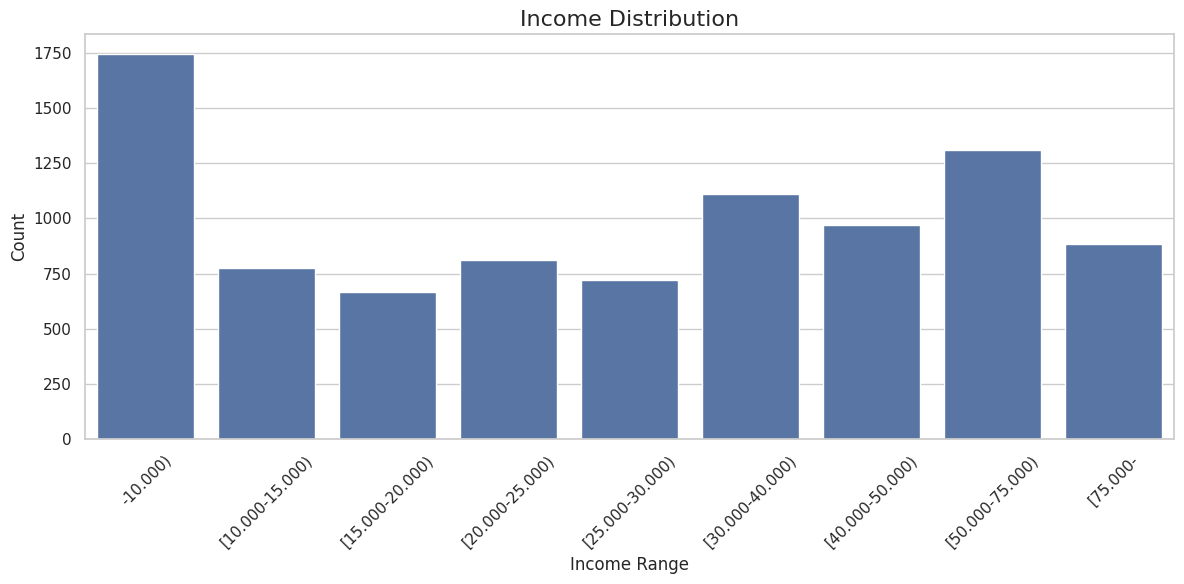

In [76]:
# Income distribution (bar plot)
plt.figure(figsize=(12, 6))
income_counts = df['INCOME'].value_counts().sort_index()
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

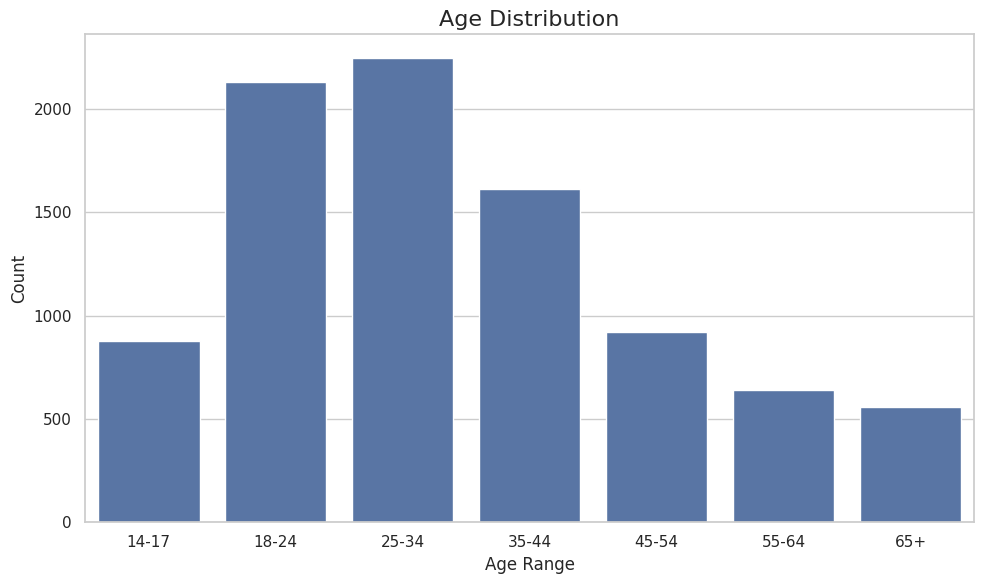

In [77]:
#  Age distribution (bar plot)
plt.figure(figsize=(10, 6))
age_counts = df['AGE'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


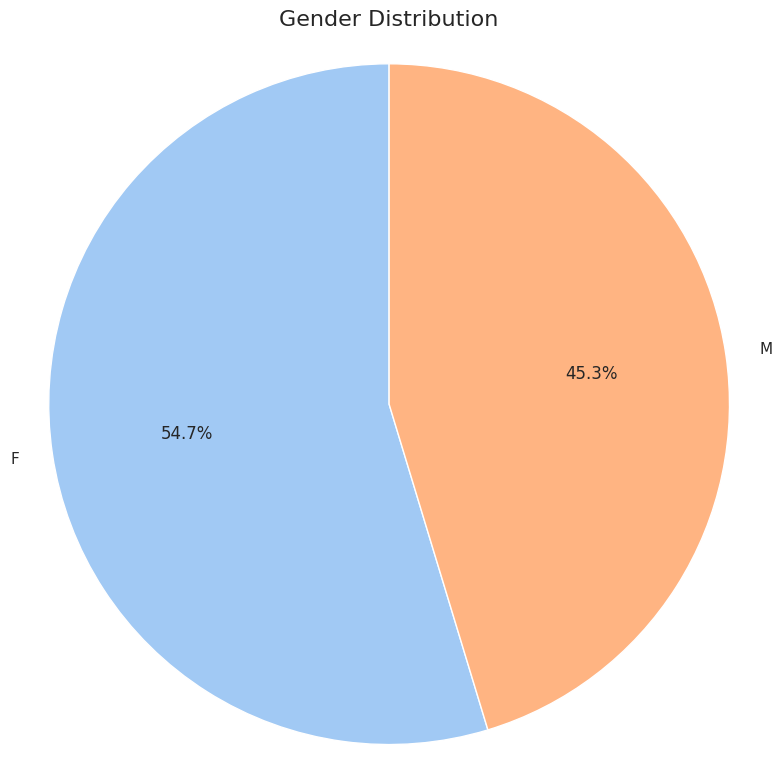

In [78]:
#Gender distribution (pie chart)
plt.figure(figsize=(8, 8))
gender_counts = df['SEX'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


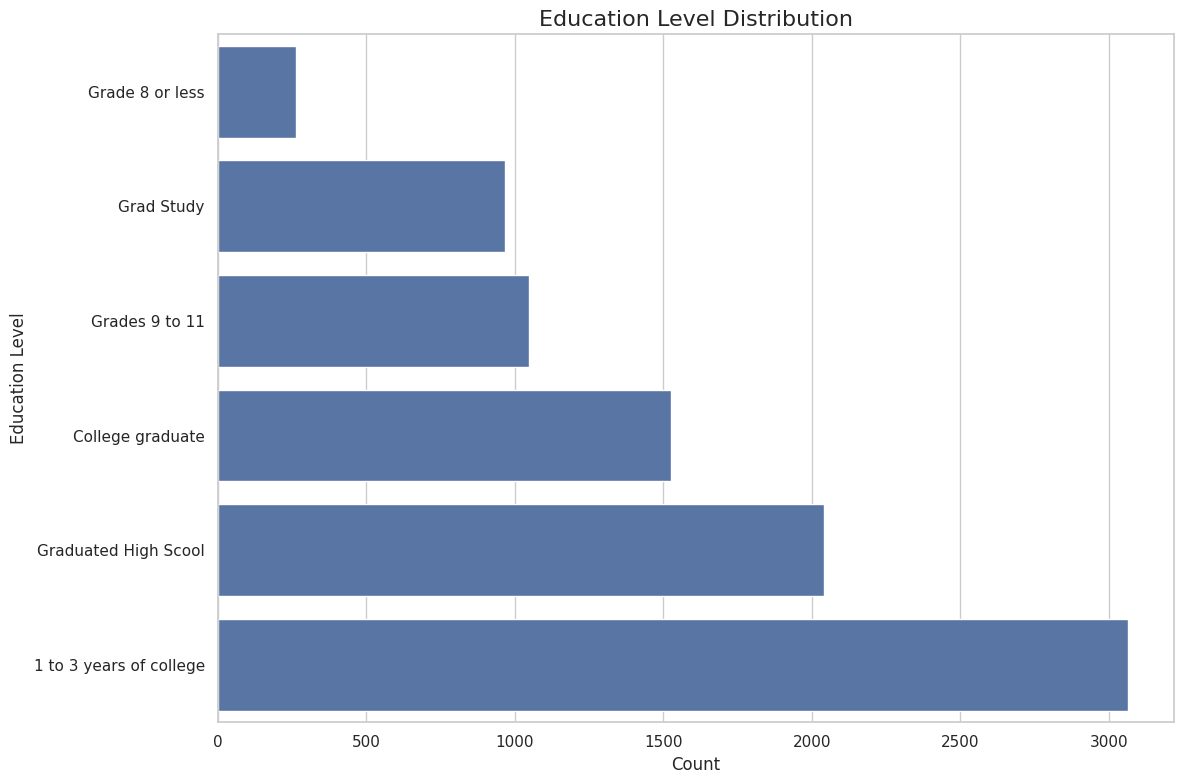

In [79]:
#Education distribution (horizontal bar plot)
plt.figure(figsize=(12, 8))
education_counts = df['EDUCATION'].value_counts().sort_values()
sns.barplot(y=education_counts.index, x=education_counts.values, orient='h')
plt.title('Education Level Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()
plt.show()


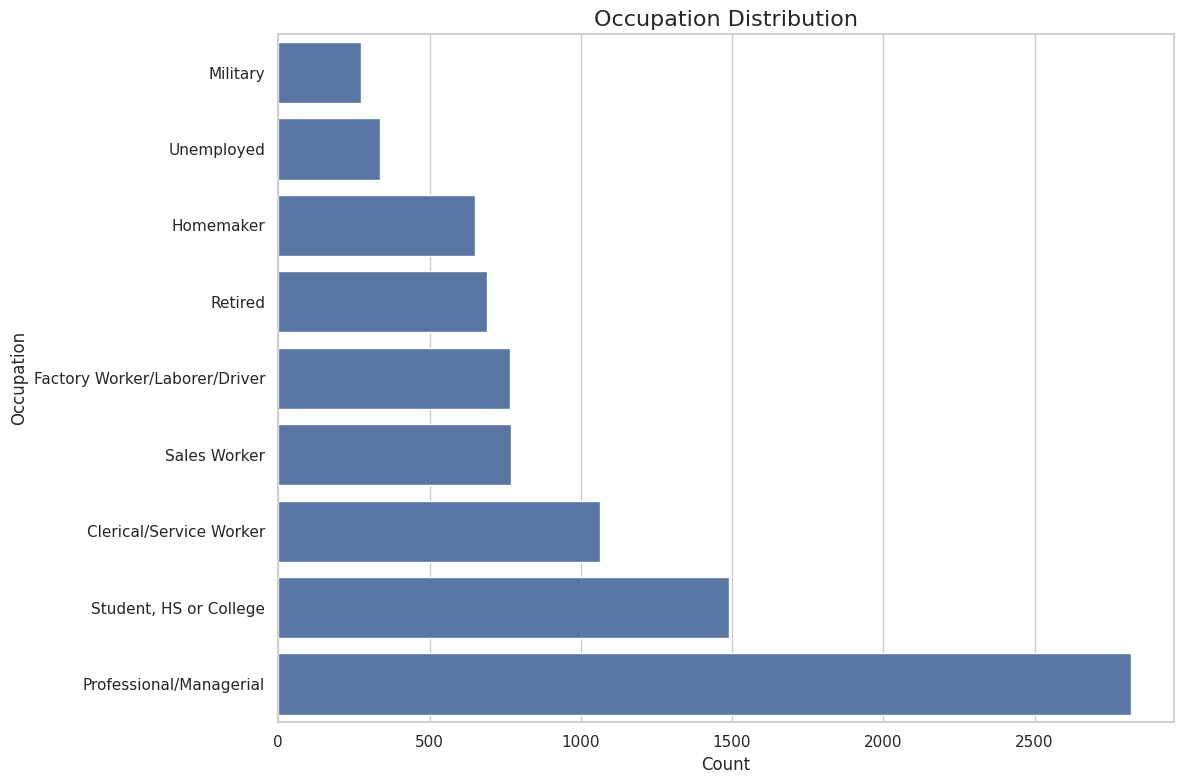

In [80]:
#(horizontal bar plot)
plt.figure(figsize=(12, 8))
occupation_counts = df['OCCUPATION'].value_counts().sort_values()
sns.barplot(y=occupation_counts.index, x=occupation_counts.values, orient='h')
plt.title('Occupation Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.show()

### 5.2 2D Visualizations

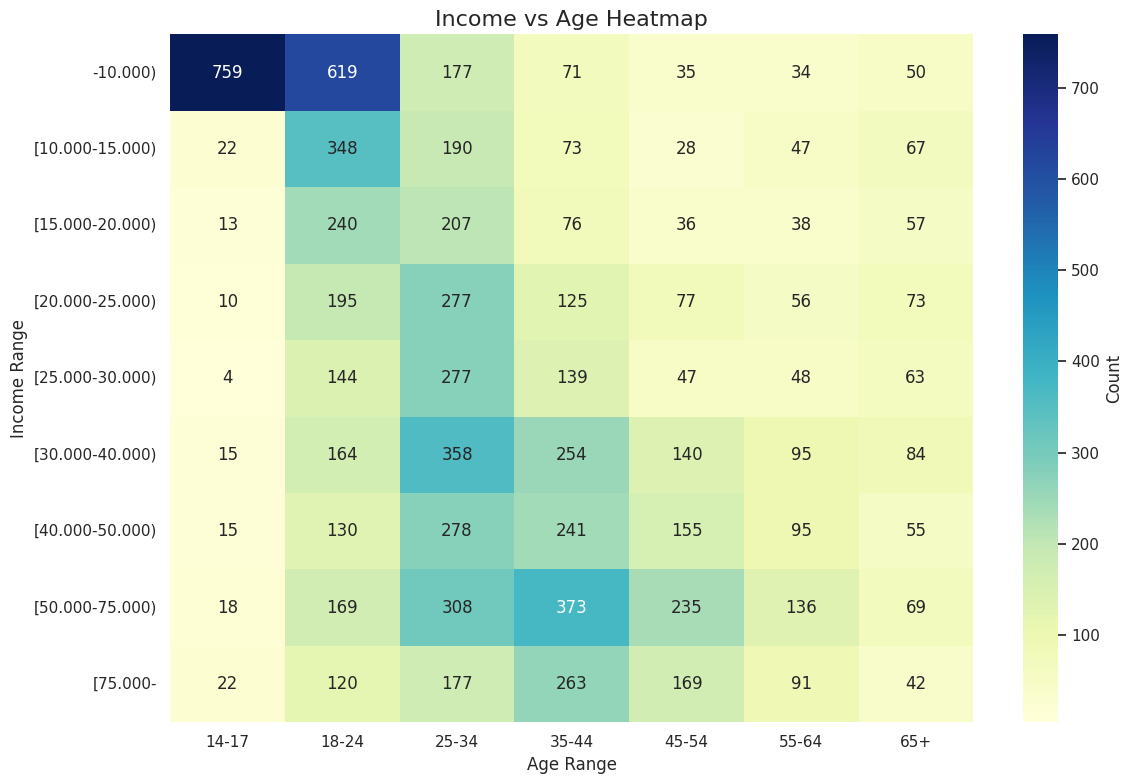

In [81]:
# 5.2.1 Income vs Age (heatmap)
plt.figure(figsize=(12, 8))
income_age_crosstab = pd.crosstab(df['INCOME'], df['AGE'])
sns.heatmap(income_age_crosstab, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Income vs Age Heatmap', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Income Range', fontsize=12)
plt.tight_layout()
plt.show()


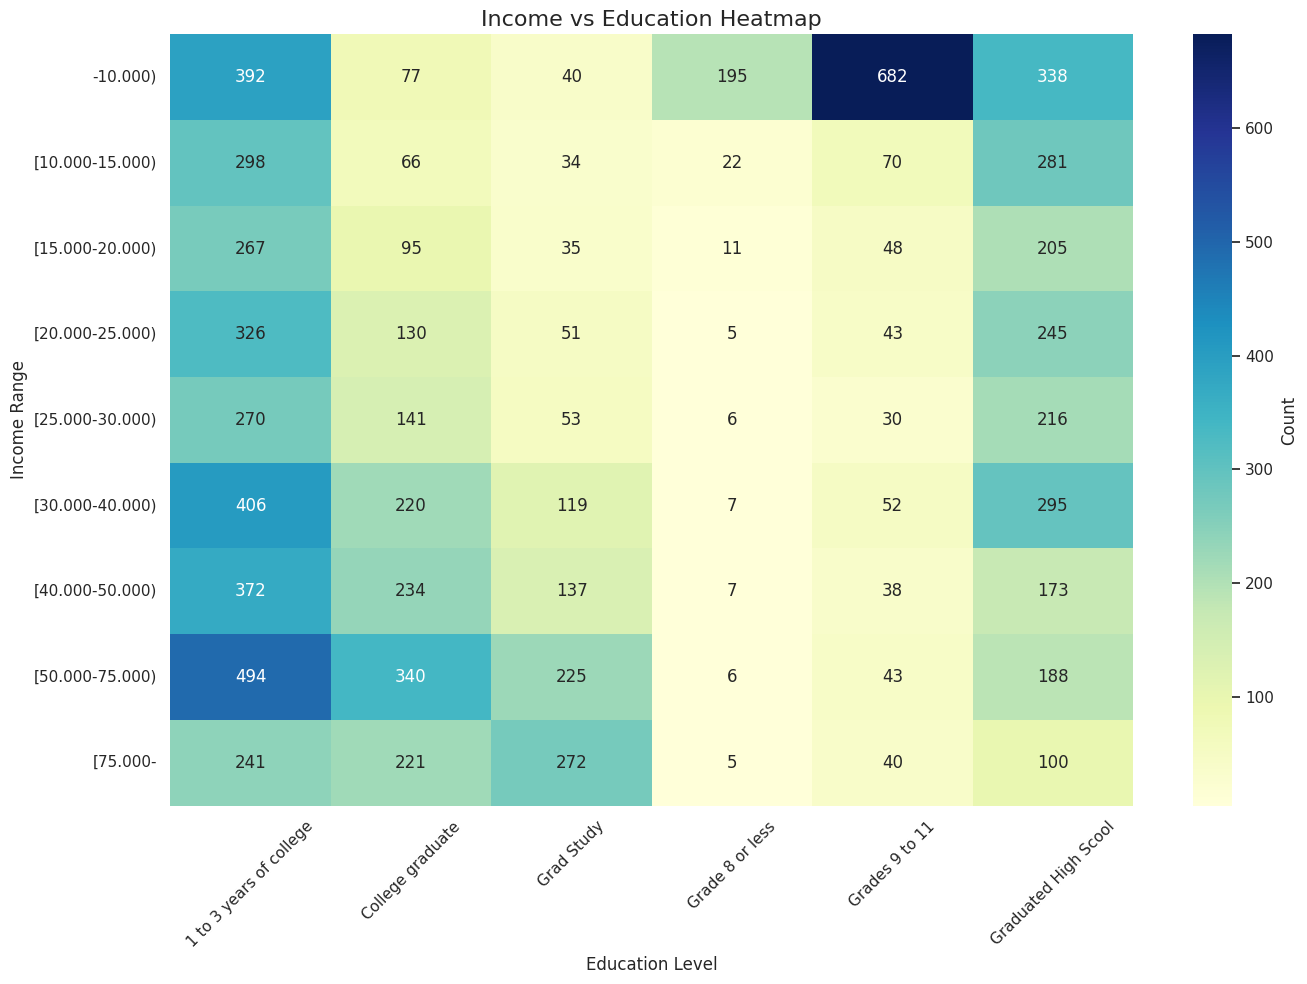

In [82]:
#Income vs Education (heatmap)
plt.figure(figsize=(14, 10))
income_education_crosstab = pd.crosstab(df['INCOME'], df['EDUCATION'])
sns.heatmap(income_education_crosstab, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Income vs Education Heatmap', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Income Range', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

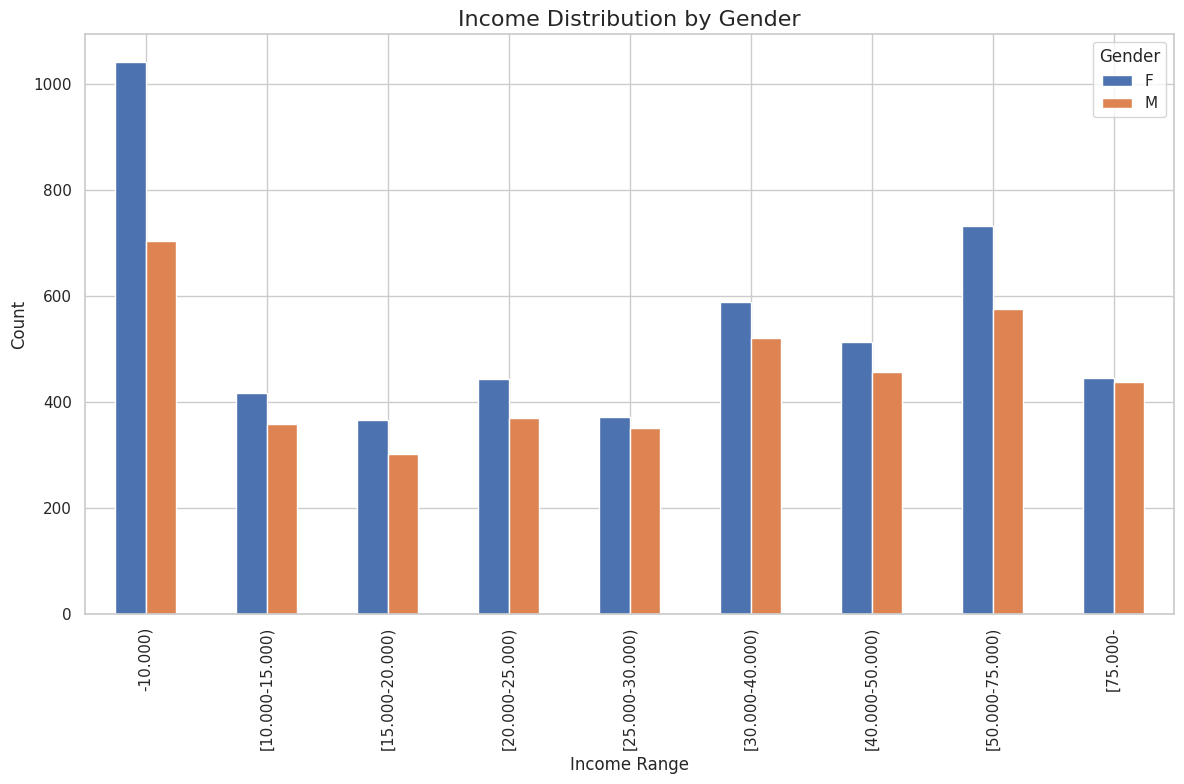

In [83]:
#Income vs Gender (grouped bar plot)
plt.figure(figsize=(12, 8))
income_gender_crosstab = pd.crosstab(df['INCOME'], df['SEX'])
income_gender_crosstab.plot(kind='bar')
plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

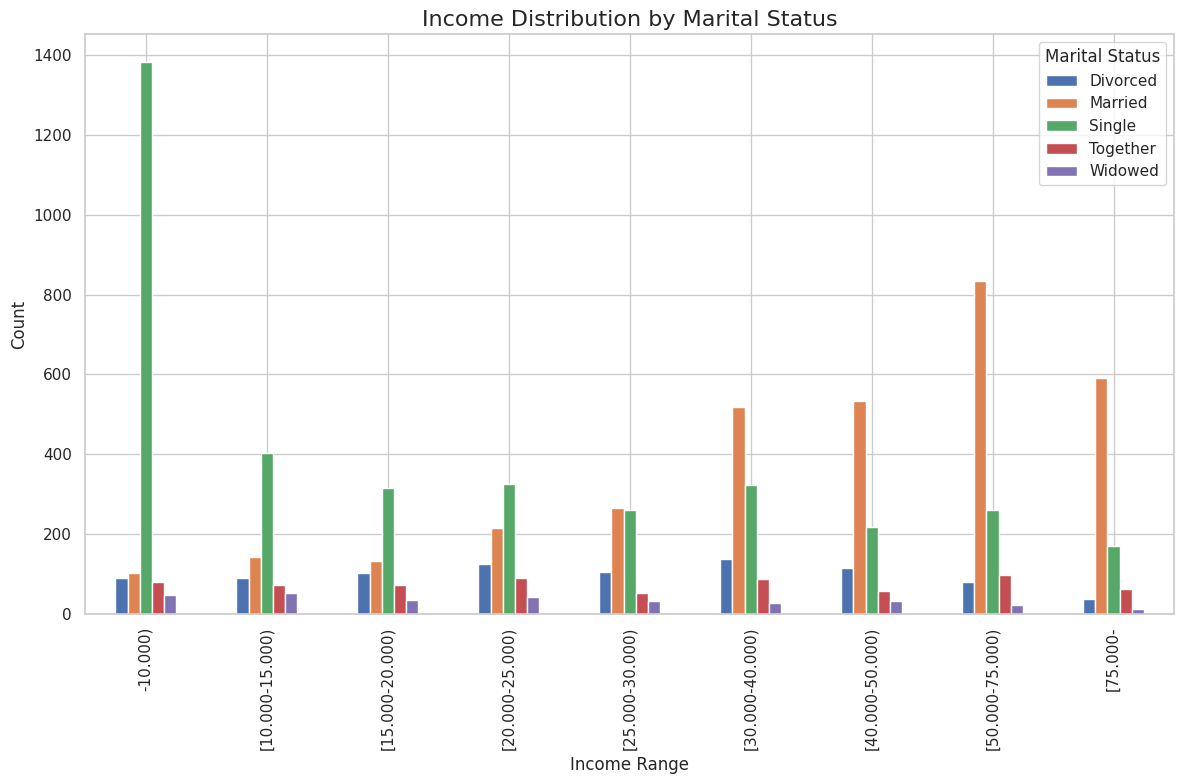

In [84]:
# Income vs Marital Status (grouped bar plot)
plt.figure(figsize=(14, 8))
income_marital_crosstab = pd.crosstab(df['INCOME'], df['MARITAL.STATUS'])
income_marital_crosstab.plot(kind='bar')
plt.title('Income Distribution by Marital Status', fontsize=16)
plt.xlabel('Income Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

### 5.3 N-D Visualizations

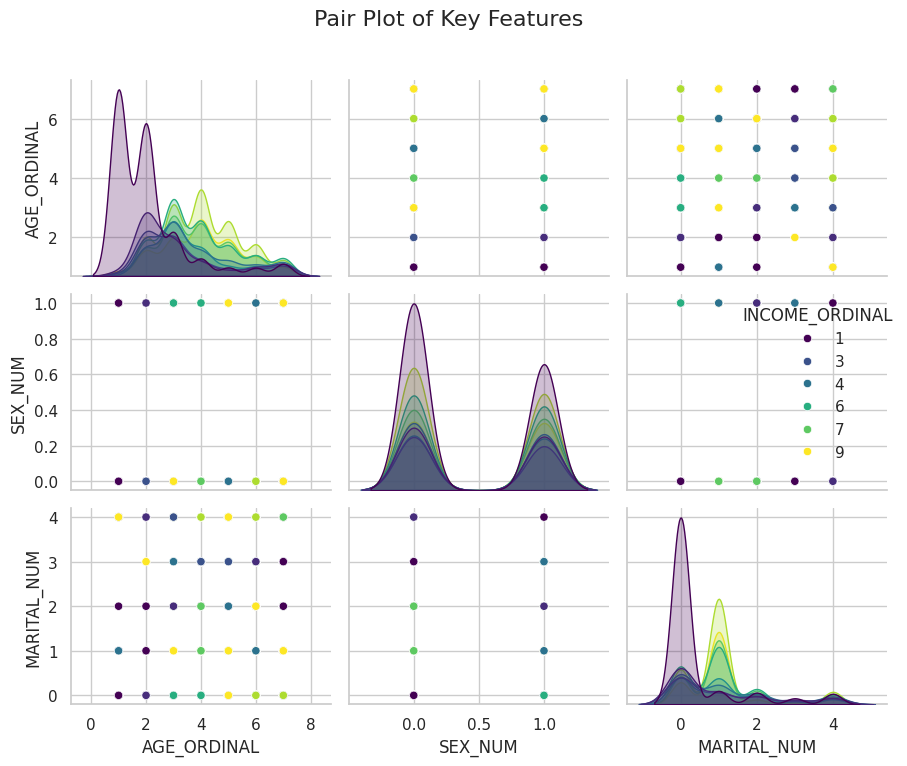

In [97]:
#Pair plot of key features

df_subset = df_cleaned[['INCOME_ORDINAL', 'AGE_ORDINAL']].copy()
df_subset['SEX_NUM'] = df_cleaned['SEX'].map({'F': 0, 'M': 1})
df_subset['MARITAL_NUM'] = df_cleaned['MARITAL.STATUS'].map({
    'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3, 'Together': 4
})
# Create the pair plot
sns.pairplot(df_subset, hue='INCOME_ORDINAL', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


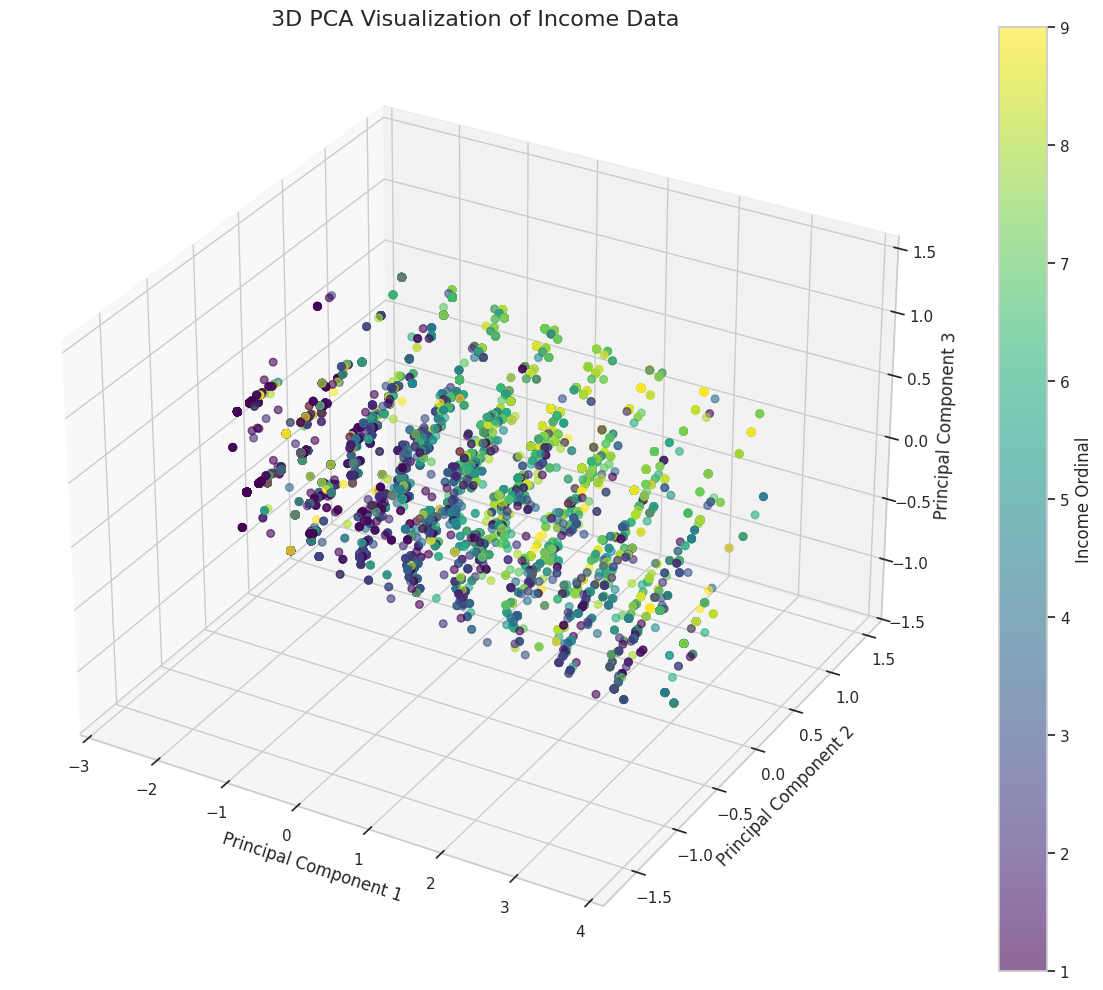

In [87]:
# 5.3.3 PCA visualization
# Prepare data for PCA
# Use a subset of the cleaned data for PCA
X_for_pca = df_cleaned[['AGE_ORDINAL']].copy()
# Add dummy variables for categorical features
cat_cols = ['SEX', 'MARITAL.STATUS', 'EDUCATION', 'OCCUPATION']
for col in cat_cols:
    dummies = pd.get_dummies(df_cleaned[col], prefix=col, drop_first=True)
    X_for_pca = pd.concat([X_for_pca, dummies], axis=1)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_for_pca)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
# Add target variable for coloring
pca_df['INCOME_ORDINAL'] = df_cleaned['INCOME_ORDINAL']

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                    c=pca_df['INCOME_ORDINAL'], cmap='viridis',
                    s=30, alpha=0.6)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.title('3D PCA Visualization of Income Data', fontsize=16)
plt.colorbar(scatter, label='Income Ordinal')
plt.tight_layout()
plt.show()

## 6. Data Dimension Analysis

### 6.1 Univariate Analysis

In [89]:
# 6.1.1 Income Analysis
income_counts = df['INCOME'].value_counts().sort_index()
income_pct = income_counts / len(df) * 100

income_analysis = pd.DataFrame({
    'Count': income_counts,
    'Percentage': income_pct
})

print('Income Distribution:')
print(income_analysis)

print('\nKey Insights:')
print(f'- Most common income bracket: {income_counts.idxmax()} ({income_pct.max():.2f}%)')
print(f'- Least common income bracket: {income_counts.idxmin()} ({income_pct.min():.2f}%)')
print(f'- Percentage of people with income below $10,000: {income_pct.iloc[0]:.2f}%')
print(f'- Percentage of people with income above $75,000: {income_pct.iloc[-1]:.2f}%')


Income Distribution:
                 Count  Percentage
INCOME                            
-10.000)          1745   19.403981
[10.000-15.000)    775    8.617814
[15.000-20.000)    667    7.416880
[20.000-25.000)    813    9.040365
[25.000-30.000)    722    8.028467
[30.000-40.000)   1110   12.342933
[40.000-50.000)    969   10.775047
[50.000-75.000)   1308   14.544646
[75.000-           884    9.829868

Key Insights:
- Most common income bracket: -10.000) (19.40%)
- Least common income bracket: [15.000-20.000) (7.42%)
- Percentage of people with income below $10,000: 19.40%
- Percentage of people with income above $75,000: 9.83%


In [90]:
# 6.1.2 Age Analysis
age_counts = df['AGE'].value_counts().sort_index()
age_pct = age_counts / len(df) * 100

age_analysis = pd.DataFrame({
    'Count': age_counts,
    'Percentage': age_pct
})

print('Age Distribution:')
print(age_analysis)

print('\nKey Insights:')
print(f'- Most common age group: {age_counts.idxmax()} ({age_pct.max():.2f}%)')
print(f'- Least common age group: {age_counts.idxmin()} ({age_pct.min():.2f}%)')
print(f'- Percentage of people under 25: {age_pct[age_pct.index.isin(["14-17", "18-24"])].sum():.2f}%')
print(f'- Percentage of people over 55: {age_pct[age_pct.index.isin(["55-64", "65+"])].sum():.2f}%')


Age Distribution:
       Count  Percentage
AGE                     
14-17    878    9.763149
18-24   2129   23.673969
25-34   2249   25.008340
35-44   1615   17.958412
45-54    922   10.252419
55-64    640    7.116646
65+      560    6.227065

Key Insights:
- Most common age group: 25-34 (25.01%)
- Least common age group: 65+ (6.23%)
- Percentage of people under 25: 33.44%
- Percentage of people over 55: 13.34%


In [91]:
# 6.1.3 Gender Analysis
gender_counts = df['SEX'].value_counts()
gender_pct = gender_counts / len(df) * 100

gender_analysis = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_pct
})

print('Gender Distribution:')
print(gender_analysis)

print('\nKey Insights:')
print(f'- Female percentage: {gender_pct["F"]:.2f}%')
print(f'- Male percentage: {gender_pct["M"]:.2f}%')
print(f'- Gender ratio (F:M): {gender_counts["F"]/gender_counts["M"]:.2f}')

Gender Distribution:
     Count  Percentage
SEX                   
F     4918   54.686979
M     4075   45.313021

Key Insights:
- Female percentage: 54.69%
- Male percentage: 45.31%
- Gender ratio (F:M): 1.21


In [92]:
# 6.1.4 Education Analysis
education_counts = df['EDUCATION'].value_counts()
education_pct = education_counts / len(df) * 100

education_analysis = pd.DataFrame({
    'Count': education_counts,
    'Percentage': education_pct
})

print('Education Distribution:')
print(education_analysis)

print('\nKey Insights:')
print(f'- Most common education level: {education_counts.idxmax()} ({education_pct.max():.2f}%)')
print(f'- Least common education level: {education_counts.idxmin()} ({education_pct.min():.2f}%)')

# Calculate higher education percentage (college or above)
higher_ed = education_pct[education_pct.index.isin(['College graduate', 'Grad Study', '1 to 3 years of college'])].sum()
print(f'- Percentage with some college or higher education: {higher_ed:.2f}%')

# Calculate high school or less
lower_ed = education_pct[education_pct.index.isin(['Graduated High Scool', 'Grades 9 to 11', 'Grade 8 or less'])].sum()
print(f'- Percentage with high school or less: {lower_ed:.2f}%')


Education Distribution:
                         Count  Percentage
EDUCATION                                 
1 to 3 years of college   3066   34.093184
Graduated High Scool      2041   22.695430
College graduate          1524   16.946514
Grades 9 to 11            1046   11.631269
Grad Study                 966   10.741688
Grade 8 or less            264    2.935617

Key Insights:
- Most common education level: 1 to 3 years of college (34.09%)
- Least common education level: Grade 8 or less (2.94%)
- Percentage with some college or higher education: 61.78%
- Percentage with high school or less: 37.26%


### 6.2 Bivariate Analysis

In [93]:
# 6.2.1 Income vs Age Analysis
income_age_crosstab = pd.crosstab(df['INCOME'], df['AGE'])
income_age_pct = income_age_crosstab.div(income_age_crosstab.sum(axis=1), axis=0) * 100

print('Income vs Age Cross-tabulation:')
print(income_age_crosstab)

print('\nIncome vs Age Cross-tabulation (row percentages):')
print(income_age_pct)

print('\nKey Insights:')
# Find age group with highest percentage in top income bracket
top_income = '[75.000-'
top_income_by_age = income_age_crosstab.loc[top_income]
max_age_for_top_income = top_income_by_age.idxmax()
print(f'- Age group with highest count in top income bracket ({top_income}): {max_age_for_top_income}')

# Find age group with highest percentage in bottom income bracket
bottom_income = '-10.000)'
bottom_income_by_age = income_age_crosstab.loc[bottom_income]
max_age_for_bottom_income = bottom_income_by_age.idxmax()
print(f'- Age group with highest count in bottom income bracket ({bottom_income}): {max_age_for_bottom_income}')

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(income_age_crosstab)
print(f'- Chi-square test for independence: chi2={chi2:.2f}, p-value={p:.10f}')
print(f"- Interpretation: Income and age are {'not' if p > 0.05 else ''} independent (p-value {p:.10f})")

Income vs Age Cross-tabulation:
AGE              14-17  18-24  25-34  35-44  45-54  55-64  65+
INCOME                                                        
-10.000)           759    619    177     71     35     34   50
[10.000-15.000)     22    348    190     73     28     47   67
[15.000-20.000)     13    240    207     76     36     38   57
[20.000-25.000)     10    195    277    125     77     56   73
[25.000-30.000)      4    144    277    139     47     48   63
[30.000-40.000)     15    164    358    254    140     95   84
[40.000-50.000)     15    130    278    241    155     95   55
[50.000-75.000)     18    169    308    373    235    136   69
[75.000-            22    120    177    263    169     91   42

Income vs Age Cross-tabulation (row percentages):
AGE                  14-17      18-24      25-34      35-44      45-54  \
INCOME                                                                   
-10.000)         43.495702  35.472779  10.143266   4.068768   2.005731   
[1

In [94]:
# 6.2.2 Income vs Gender Analysis
income_gender_crosstab = pd.crosstab(df['INCOME'], df['SEX'])
income_gender_pct = income_gender_crosstab.div(income_gender_crosstab.sum(axis=0), axis=1) * 100

print('Income vs Gender Cross-tabulation:')
print(income_gender_crosstab)

print('\nIncome vs Gender Cross-tabulation (column percentages):')
print(income_gender_pct)

print('\nKey Insights:')
# Compare top income bracket by gender
top_income = '[75.000-'
top_income_pct_female = income_gender_pct.loc[top_income, 'F']
top_income_pct_male = income_gender_pct.loc[top_income, 'M']
print(f'- Percentage of females in top income bracket ({top_income}): {top_income_pct_female:.2f}%')
print(f'- Percentage of males in top income bracket ({top_income}): {top_income_pct_male:.2f}%')
print(f'- Ratio of males to females in top income bracket: {income_gender_crosstab.loc[top_income, "M"] / income_gender_crosstab.loc[top_income, "F"]:.2f}')

# Compare bottom income bracket by gender
bottom_income = '-10.000)'
bottom_income_pct_female = income_gender_pct.loc[bottom_income, 'F']
bottom_income_pct_male = income_gender_pct.loc[bottom_income, 'M']
print(f'- Percentage of females in bottom income bracket ({bottom_income}): {bottom_income_pct_female:.2f}%')
print(f'- Percentage of males in bottom income bracket ({bottom_income}): {bottom_income_pct_male:.2f}%')

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(income_gender_crosstab)
print(f'- Chi-square test for independence: chi2={chi2:.2f}, p-value={p:.10f}')
print(f"- Interpretation: Income and gender are {'not' if p > 0.05 else ''} independent (p-value {p:.10f})")

Income vs Gender Cross-tabulation:
SEX                 F    M
INCOME                    
-10.000)         1042  703
[10.000-15.000)   417  358
[15.000-20.000)   365  302
[20.000-25.000)   443  370
[25.000-30.000)   371  351
[30.000-40.000)   589  521
[40.000-50.000)   513  456
[50.000-75.000)   732  576
[75.000-          446  438

Income vs Gender Cross-tabulation (column percentages):
SEX                      F          M
INCOME                               
-10.000)         21.187475  17.251534
[10.000-15.000)   8.479057   8.785276
[15.000-20.000)   7.421716   7.411043
[20.000-25.000)   9.007727   9.079755
[25.000-30.000)   7.543717   8.613497
[30.000-40.000)  11.976413  12.785276
[40.000-50.000)  10.431070  11.190184
[50.000-75.000)  14.884099  14.134969
[75.000-          9.068727  10.748466

Key Insights:
- Percentage of females in top income bracket ([75.000-): 9.07%
- Percentage of males in top income bracket ([75.000-): 10.75%
- Ratio of males to females in top income bracket: 

In [95]:
# 6.2.3 Income vs Education Analysis
income_education_crosstab = pd.crosstab(df['INCOME'], df['EDUCATION'])
income_education_pct = income_education_crosstab.div(income_education_crosstab.sum(axis=0), axis=1) * 100

print('Income vs Education Cross-tabulation (sample):')
print(income_education_crosstab.iloc[:3, :3])  # Just show a sample

print('\nKey Insights:')
# Find education level with highest percentage in top income bracket
top_income = '[75.000-'
top_income_by_education = income_education_crosstab.loc[top_income]
max_education_for_top_income = top_income_by_education.idxmax()
print(f'- Education level with highest count in top income bracket ({top_income}): {max_education_for_top_income}')

# Find education level with highest percentage in bottom income bracket
bottom_income = '-10.000)'
bottom_income_by_education = income_education_crosstab.loc[bottom_income]
max_education_for_bottom_income = bottom_income_by_education.idxmax()
print(f'- Education level with highest count in bottom income bracket ({bottom_income}): {max_education_for_bottom_income}')

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(income_education_crosstab)
print(f'- Chi-square test for independence: chi2={chi2:.2f}, p-value={p:.10f}')
print(f"- Interpretation: Income and education are {'not' if p > 0.05 else ''} independent (p-value {p:.10f})")

Income vs Education Cross-tabulation (sample):
EDUCATION        1 to 3 years of college  College graduate  Grad Study
INCOME                                                                
-10.000)                             392                77          40
[10.000-15.000)                      298                66          34
[15.000-20.000)                      267                95          35

Key Insights:
- Education level with highest count in top income bracket ([75.000-): Grad Study
- Education level with highest count in bottom income bracket (-10.000)): Grades 9 to 11
- Chi-square test for independence: chi2=3198.36, p-value=0.0000000000
- Interpretation: Income and education are  independent (p-value 0.0000000000)


### 6.3 Multivariate Analysis

In [98]:
# 6.3.2 Income vs Education vs Occupation Analysis
# Focus on high income and education level
high_income_brackets = ['[50.000-75.000)', '[75.000-']
high_education = ['College graduate', 'Grad Study']

high_income_education = df[
    (df['INCOME'].isin(high_income_brackets)) &
    (df['EDUCATION'].isin(high_education))
]

occupation_counts = high_income_education['OCCUPATION'].value_counts()
occupation_pct = occupation_counts / len(high_income_education) * 100

print('Analysis of High Income and High Education Individuals:')
print(f'- Total individuals with high income and high education: {len(high_income_education)}')
print(f'- Percentage of dataset: {len(high_income_education) / len(df) * 100:.2f}%\n')

print('Occupation Distribution for High Income, High Education Individuals:')
for occupation, count in occupation_counts.items():
    print(f'- {occupation}: {count} ({occupation_pct[occupation]:.2f}%)')

print('\nKey Insights:')
print(f'- Most common occupation for high income, high education: {occupation_counts.index[0]} ({occupation_pct.iloc[0]:.2f}%)')

# Compare with overall occupation distribution
overall_occupation = df['OCCUPATION'].value_counts()
overall_occupation_pct = overall_occupation / len(df) * 100

print('\nComparison with Overall Occupation Distribution:')
for occupation in occupation_counts.index[:3]:  # Top 3 occupations
    overall_pct = overall_occupation_pct[occupation] if occupation in overall_occupation_pct.index else 0
    high_pct = occupation_pct[occupation]
    print(f'- {occupation}: {high_pct:.2f}% in high income/education group vs {overall_pct:.2f}% overall')

Analysis of High Income and High Education Individuals:
- Total individuals with high income and high education: 1058
- Percentage of dataset: 11.76%

Occupation Distribution for High Income, High Education Individuals:
- Professional/Managerial: 753 (71.17%)
- Retired: 89 (8.41%)
- Homemaker: 68 (6.43%)
- Sales Worker: 60 (5.67%)
- Clerical/Service Worker: 33 (3.12%)
- Military: 19 (1.80%)
- Student, HS or College: 13 (1.23%)
- Unemployed: 11 (1.04%)
- Factory Worker/Laborer/Driver: 8 (0.76%)

Key Insights:
- Most common occupation for high income, high education: Professional/Managerial (71.17%)

Comparison with Overall Occupation Distribution:
- Professional/Managerial: 71.17% in high income/education group vs 31.36% overall
- Retired: 8.41% in high income/education group vs 7.67% overall
- Homemaker: 6.43% in high income/education group vs 7.23% overall


## 7. Dimensionality Reduction

### 7.1 Principal Component Analysis (PCA)

In [100]:
# Prepare data for dimensionality reduction
print('Preparing data for dimensionality reduction...')
# Use a subset of the cleaned data
X_for_dim_reduction = df_cleaned[['AGE_ORDINAL']].copy()
# Add dummy variables for categorical features
cat_cols = ['SEX', 'MARITAL.STATUS', 'EDUCATION', 'OCCUPATION', 'AREA',
            'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOUSEHOLDER',
            'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE']

for col in cat_cols:
    dummies = pd.get_dummies(df_cleaned[col], prefix=col, drop_first=True)
    X_for_dim_reduction = pd.concat([X_for_dim_reduction, dummies], axis=1)

# Target variable
y = df_cleaned['INCOME_ORDINAL']

print(f'Data prepared with {X_for_dim_reduction.shape[1]} features')

Preparing data for dimensionality reduction...
Data prepared with 57 features


Applying PCA...
Number of components for 95% variance: 31


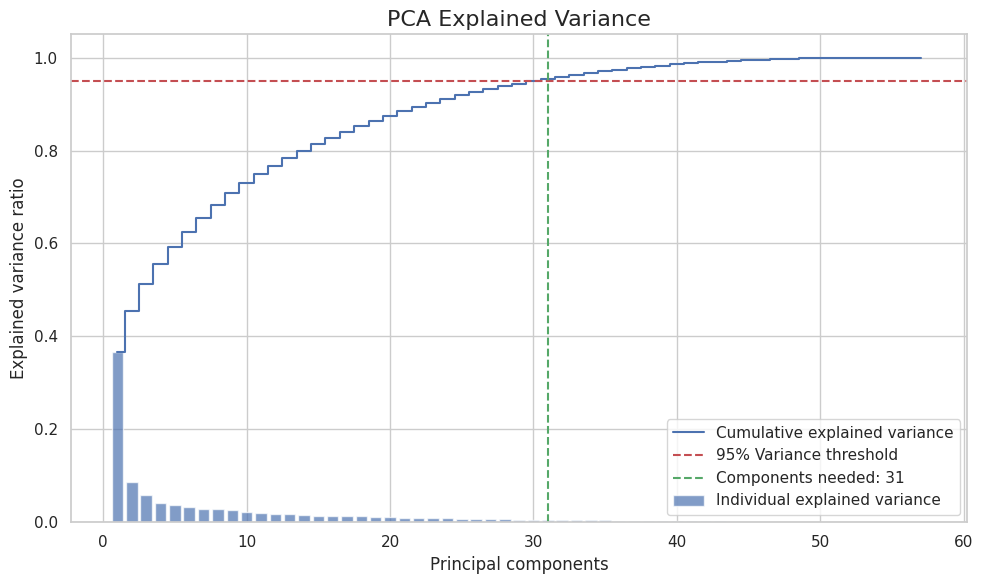


PCA DIMENSIONALITY REDUCTION
Original number of features: 57
Number of components for 95% variance: 31
Dimensionality reduction: 57 -> 31 (54.39%)

Top 10 Principal Components Explained Variance:
PC1: 0.3672 (0.3672 cumulative)
PC2: 0.0869 (0.4541 cumulative)
PC3: 0.0592 (0.5134 cumulative)
PC4: 0.0420 (0.5553 cumulative)
PC5: 0.0365 (0.5918 cumulative)
PC6: 0.0334 (0.6252 cumulative)
PC7: 0.0290 (0.6542 cumulative)
PC8: 0.0280 (0.6821 cumulative)
PC9: 0.0257 (0.7078 cumulative)
PC10: 0.0224 (0.7302 cumulative)


In [101]:
# Apply PCA
print('Applying PCA...')
pca = PCA()
X_pca = pca.fit_transform(X_for_dim_reduction)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components for 95% variance: {n_components_95}')

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance threshold')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'Components needed: {n_components_95}')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Explained Variance', fontsize=16)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# PCA results
print('\nPCA DIMENSIONALITY REDUCTION')
print('===========================')
print(f'Original number of features: {X_for_dim_reduction.shape[1]}')
print(f'Number of components for 95% variance: {n_components_95}')
print(f'Dimensionality reduction: {X_for_dim_reduction.shape[1]} -> {n_components_95} ({n_components_95/X_for_dim_reduction.shape[1]*100:.2f}%)')

print('\nTop 10 Principal Components Explained Variance:')
for i, var in enumerate(explained_variance[:10]):
    print(f'PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)')


### 7.3 Feature Selection

Applying ANOVA F-value feature selection...


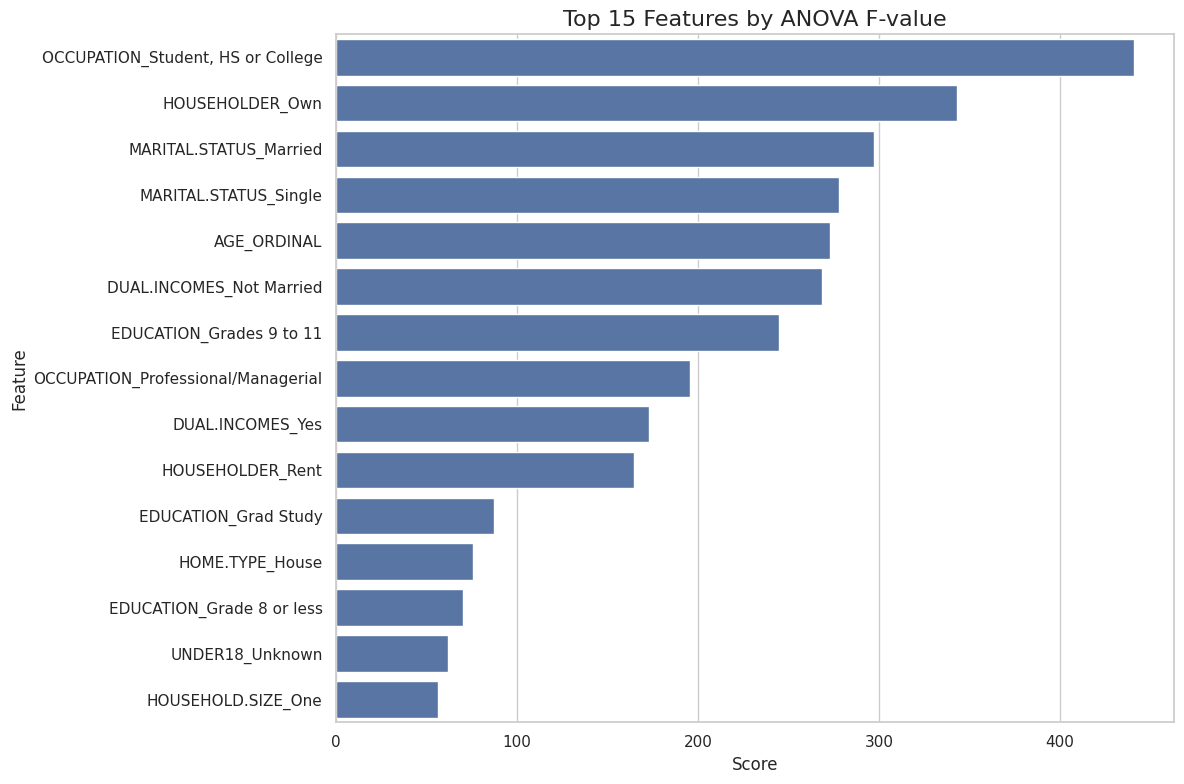


ANOVA F-VALUE FEATURE SELECTION
Original number of features: 57
Selected top 15 features

Top 15 Features by F-value:
1. OCCUPATION_Student, HS or College: Score=440.9271, P-value=0.0000000000
2. HOUSEHOLDER_Own: Score=343.0506, P-value=0.0000000000
3. MARITAL.STATUS_Married: Score=296.9918, P-value=0.0000000000
4. MARITAL.STATUS_Single: Score=278.1907, P-value=0.0000000000
5. AGE_ORDINAL: Score=273.1983, P-value=0.0000000000
6. DUAL.INCOMES_Not Married: Score=268.4019, P-value=0.0000000000
7. EDUCATION_Grades 9 to 11: Score=244.6185, P-value=0.0000000000
8. OCCUPATION_Professional/Managerial: Score=195.8199, P-value=0.0000000000
9. DUAL.INCOMES_Yes: Score=172.8712, P-value=0.0000000000
10. HOUSEHOLDER_Rent: Score=164.9462, P-value=0.0000000000
11. EDUCATION_Grad Study: Score=87.1487, P-value=0.0000000000
12. HOME.TYPE_House: Score=75.9866, P-value=0.0000000000
13. EDUCATION_Grade 8 or less: Score=70.2089, P-value=0.0000000000
14. UNDER18_Unknown: Score=61.8721, P-value=0.0000000000
1

In [106]:
# 7.3.1 ANOVA F-value feature selection
print('Applying ANOVA F-value feature selection...')
selector = SelectKBest(f_classif, k=15)
X_kbest = selector.fit_transform(X_for_dim_reduction, y)

# Get feature scores
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame with feature names, scores, and p-values
feature_scores = pd.DataFrame({
    'Feature': X_for_dim_reduction.columns,
    'Score': scores,
    'P-value': p_values
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = feature_scores.head(15)
sns.barplot(x='Score', y='Feature', data=top_features)
plt.title('Top 15 Features by ANOVA F-value', fontsize=16)
plt.tight_layout()
plt.show()

# ANOVA results
print('\nANOVA F-VALUE FEATURE SELECTION')
print('=============================')
print(f'Original number of features: {X_for_dim_reduction.shape[1]}')
print(f'Selected top 15 features')

print('\nTop 15 Features by F-value:')
for i, (feature, score, p_value) in enumerate(zip(top_features['Feature'], top_features['Score'], top_features['P-value'])):
    print(f'{i+1}. {feature}: Score={score:.4f}, P-value={p_value:.10f}')


# Modelling and Evaluating

In [103]:
# Prepare data for modeling
print('Preparing data for modeling...')


X_for_model = df_cleaned[['AGE_ORDINAL']].copy()
cat_cols = ['SEX', 'MARITAL.STATUS', 'EDUCATION', 'OCCUPATION']
for col in cat_cols:
    dummies = pd.get_dummies(df_cleaned[col], prefix=col, drop_first=True)
    X_for_model = pd.concat([X_for_model, dummies], axis=1)


y = df_cleaned['INCOME_ORDINAL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_for_model, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Preparing data for modeling...
Training set shape: (7194, 19), (7194,)
Testing set shape: (1799, 19), (1799,)


Training Logistic Regression...
Logistic Regression Accuracy: 0.3302
Logistic Regression Cross-Validation Scores: [0.32244614 0.32314107 0.31688673 0.34259903 0.33657858]
Logistic Regression Mean CV Score: 0.3283

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.78      0.67       371
           2       0.25      0.22      0.23       144
           3       0.24      0.09      0.13       139
           4       0.15      0.15      0.15       155
           5       0.00      0.00      0.00       138
           6       0.19      0.20      0.19       226
           7       0.18      0.07      0.10       200
           8       0.25      0.51      0.34       259
           9       0.39      0.28      0.32       167

    accuracy                           0.33      1799
   macro avg       0.25      0.25      0.24      1799
weighted avg       0.29      0.33      0.29      1799



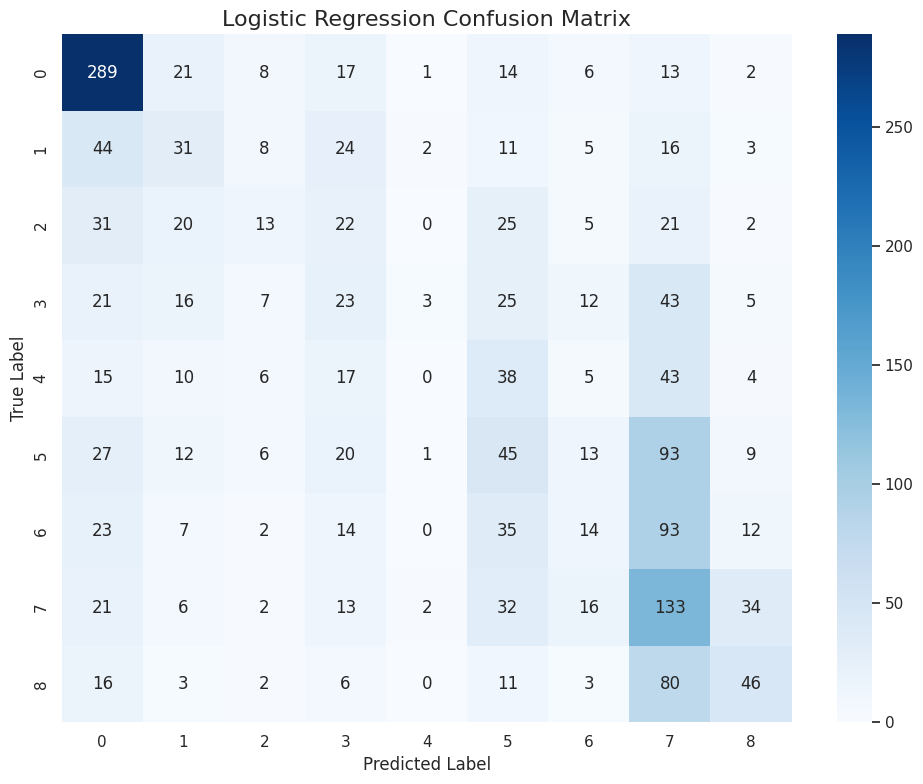

In [105]:
#Logistic Regression model


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import cross_val_score from the correct module
from sklearn.model_selection import cross_val_score
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.4f}')

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f'Logistic Regression Cross-Validation Scores: {cv_scores_lr}')
print(f'Logistic Regression Mean CV Score: {cv_scores_lr.mean():.4f}')

# Classification summary
print('\nLogistic Regression Classification Report:')
lr_report = classification_report(y_test, y_pred_lr)
print(lr_report)

# Confusion matrix
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()